Initialization

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from rich import print

try:
    import control as ct
    print("python-control", ct.__version__)
except ImportError:
    import control as ct

python-control 0.10.2

![](../public/images/Springmass-coupled.png)

系统的动力学可以写成

$$
    m \ddot{q}_1 = -2k q_1 - c \dot{q}_1 + k q_2, \\
    m \ddot{q}_2 = k q_1 - 2k q_2 - c \dot{q}_2 + k u
$$

或状态空间形式：

$$
\frac{d\mathbf{x}}{dt} =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
-\dfrac{2k}{m} & \dfrac{k}{m} & -\dfrac{c}{m} & 0 \\
\dfrac{k}{m} & -\dfrac{2k}{m} & 0 & -\dfrac{c}{m}
\end{bmatrix}
\mathbf{x}
+
\begin{bmatrix}
0 \\ 0 \\ 0 \\ \dfrac{k}{m}
\end{bmatrix}
u.
$$

In [3]:
# 定义参数
m, c, k = 1, 0.1, 2
# 建立线性系统
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-2*k/m, k/m, -c/m, 0],
    [k/m, -2*k/m, 0, -c/m]
])
B = np.array([[0], [0], [0], [k/m]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
D = 0

sys = ct.ss(A, B, C, D, outputs=['q1', 'q2'], name="coupled spring mass")
print(sys)

<StateSpace>: coupled spring mass
Inputs (1): ['u[0]']
Outputs (2): ['q1', 'q2']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.   0.   1.   0. ]
     [ 0.   0.   0.   1. ]
     [-4.   2.  -0.1  0. ]
     [ 2.  -4.   0.  -0.1]]

B = [[0.]
     [0.]
     [0.]
     [2.]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]]

D = [[0.]
     [0.]]


初始响应（Initial response）

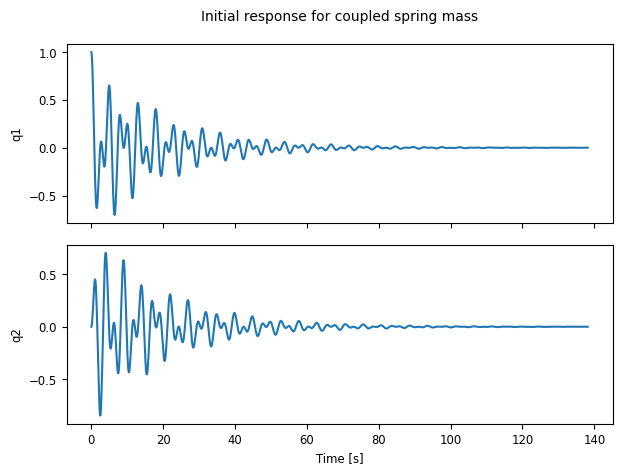

In [4]:
response = ct.initial_response(sys, X0=[1, 0, 0, 0])
cplt = response.plot()

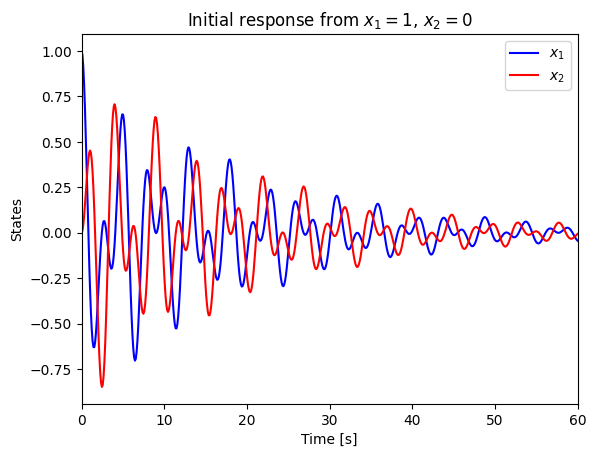

In [5]:
# 绘制结果于同一图中，用不同的颜色表示
t = response.time
x = response.states
plt.plot(t, x[0], 'b', t, x[1], 'r')
plt.legend(['$x_1$', '$x_2$'])
plt.xlim(0, 60)
plt.ylabel('States')
plt.xlabel('Time [s]')
plt.title("Initial response from $x_1 = 1$, $x_2 = 0$");

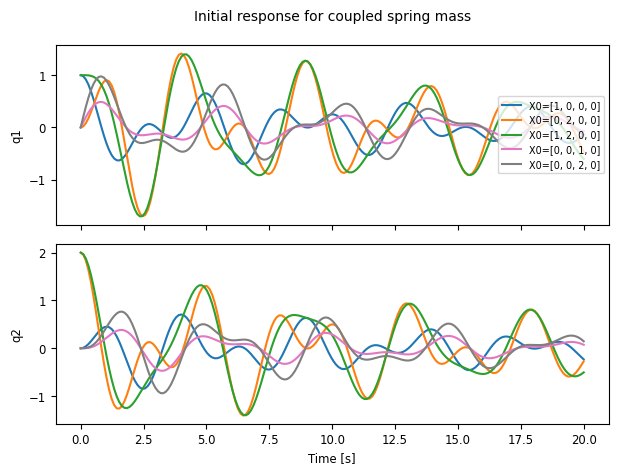

In [6]:
for X0 in [[1, 0, 0, 0], [0, 2, 0, 0], [1, 2, 0, 0], [0, 0, 1, 0], [0, 0, 2, 0]]:
  response = ct.initial_response(sys, T=20, X0=X0)
  response.plot(label=f"{X0=}")

阶跃响应（Step response）

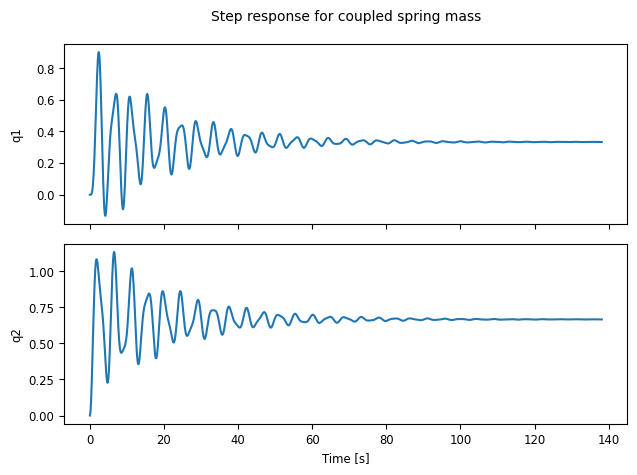

In [7]:
cplt = ct.step_response(sys).plot()

In [8]:
step_info = ct.step_info(sys)
print("Input 0, output 0 rise time = ",
      step_info[0][0]['RiseTime'], "seconds\n")
step_info

Input 0, output 0 rise time =  0.6153902252990764 seconds



[[{'RiseTime': 0.6153902252990764,
   'SettlingTime': 89.02645259326638,
   'SettlingMin': -0.13272845655369397,
   'SettlingMax': 0.9005994876222031,
   'Overshoot': 170.1798462866608,
   'Undershoot': 39.81853696610818,
   'Peak': 0.9005994876222031,
   'PeakTime': 2.3589958636464594,
   'SteadyStateValue': 0.3333333333333335}],
 [{'RiseTime': 0.6153902252990764,
   'SettlingTime': 73.64169696078947,
   'SettlingMin': 0.2276019820782239,
   'SettlingMax': 1.133893377102149,
   'Overshoot': 70.08400656532237,
   'Undershoot': 0.0,
   'Peak': 1.133893377102149,
   'PeakTime': 6.564162403190148,
   'SteadyStateValue': 0.6666666666666666}]]

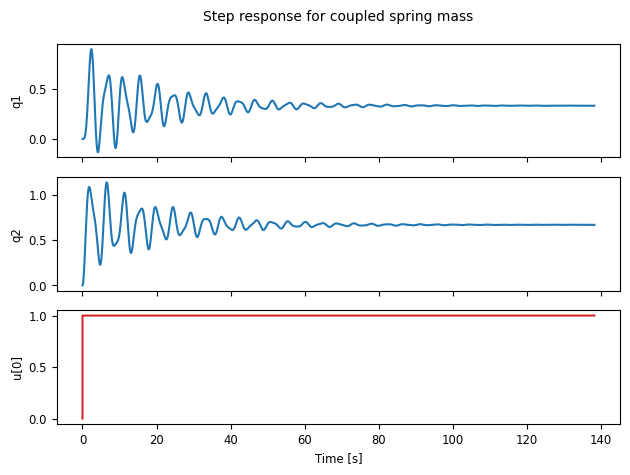

In [9]:
stepresp = ct.step_response(sys)
cplt = stepresp.plot(plot_inputs=True)

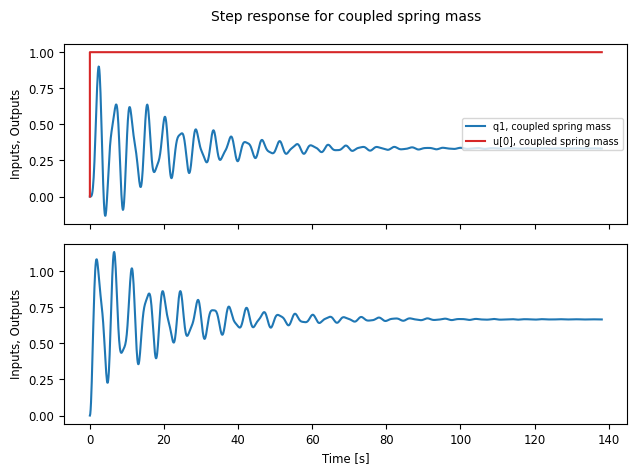

In [10]:
cplt = stepresp.plot(plot_inputs='overlay')

In [11]:
print(f"{stepresp.time.shape=}")
print(f"{stepresp.inputs.shape=}")
print(f"{stepresp.states.shape=}")
print(f"{stepresp.outputs.shape=}")

stepresp.time.shape=(1348,)
stepresp.inputs.shape=(1, 1, 1348)
stepresp.states.shape=(4, 1, 1348)
stepresp.outputs.shape=(2, 1, 1348)


强制响应（Forced response）

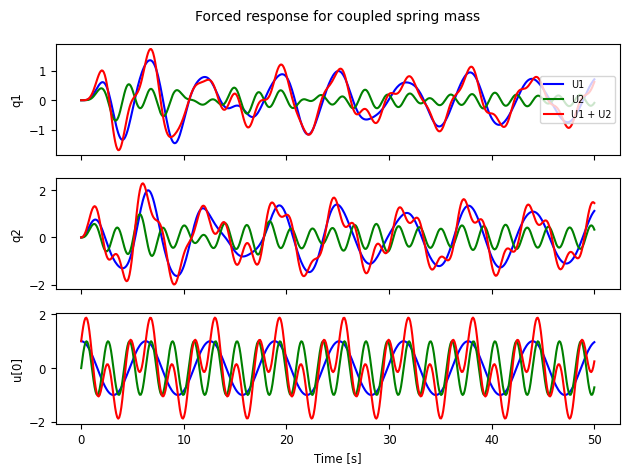

In [12]:
T = np.linspace(0, 50, 500)
U1 = np.cos(T)
U2 = np.sin(3 * T)

resp1 = ct.forced_response(sys, T, U1)
resp2 = ct.forced_response(sys, T, U2)
resp3 = ct.forced_response(sys, T, U1 + U2)

# Plot the individual responses
resp1.sysname = 'U1'; resp1.plot(color='b')
resp2.sysname = 'U2'; resp2.plot(color='g')
resp3.sysname = 'U1 + U2'; resp3.plot(color='r');

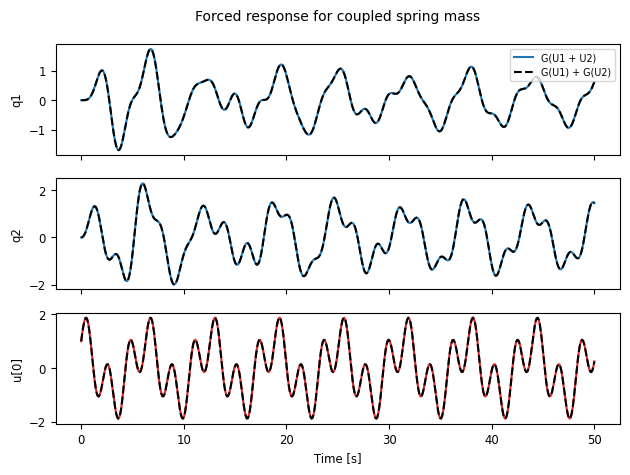

In [13]:
# Show that the system response is linear
cplt = resp3.plot(label="G(U1 + U2)")
cplt.axes[0, 0].plot(resp1.time, resp1.outputs[0] + resp2.outputs[0], 'k--', label="G(U1) + G(U2)")
cplt.axes[1, 0].plot(resp1.time, resp1.outputs[1] + resp2.outputs[1], 'k--')
cplt.axes[2, 0].plot(resp1.time, resp1.inputs[0] + resp2.inputs[0], 'k--')
cplt.axes[0, 0].legend(loc='upper right', fontsize='x-small');

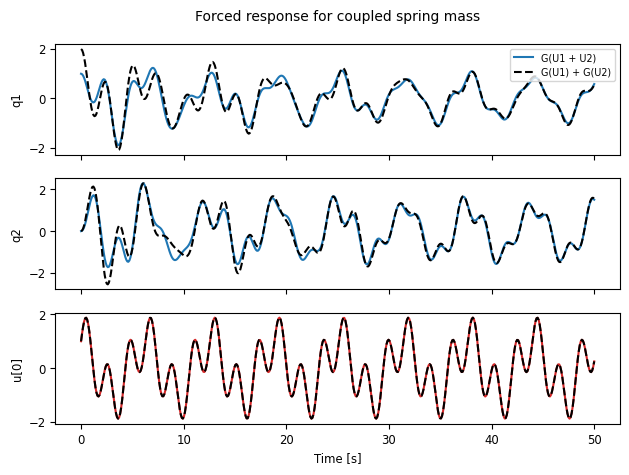

In [14]:
# Show that the forced response from non-zero initial condition is not linear
X0 = [1, 0, 0, 0]
resp1 = ct.forced_response(sys, T, U1, X0=X0)
resp2 = ct.forced_response(sys, T, U2, X0=X0)
resp3 = ct.forced_response(sys, T, U1 + U2, X0=X0)

cplt = resp3.plot(label="G(U1 + U2)")
cplt.axes[0, 0].plot(resp1.time, resp1.outputs[0] + resp2.outputs[0], 'k--', label="G(U1) + G(U2)")
cplt.axes[1, 0].plot(resp1.time, resp1.outputs[1] + resp2.outputs[1], 'k--')
cplt.axes[2, 0].plot(resp1.time, resp1.inputs[0] + resp2.inputs[0], 'k--')
cplt.axes[0, 0].legend(loc='upper right', fontsize='x-small');

频率响应（Frequency response）

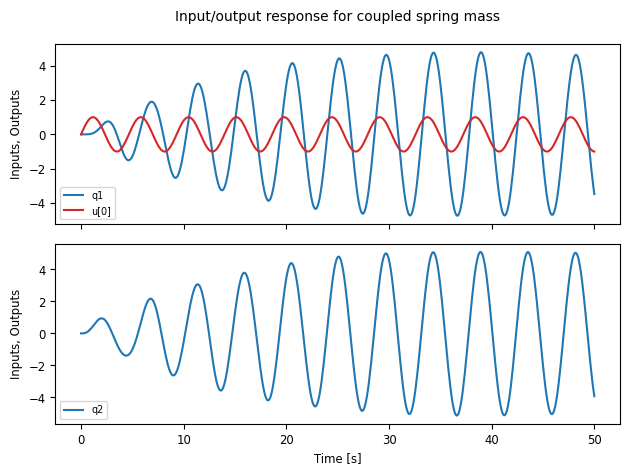

In [15]:
# Manual computation of the frequency response
resp = ct.input_output_response(sys, T, np.sin(1.35 * T))

cplt = resp.plot(
    plot_inputs='overlay',
    legend_map=np.array([['lower left'], ['lower left']]),
    label=[['q1', 'u[0]'], ['q2', None]])

In [18]:
try:
    G = ct.ss2tf(sys, name='u to q1, q2')
except ct.ControlMIMONotImplemented:
    # Create SISO transfer functions, in case we don't have slycot
    G = ct.ss2tf(sys[0, 0], name='u to q1')
print(G)

<TransferFunction>: u to q1, q2
Inputs (1): ['u[0]']
Outputs (2): ['q1', 'q2']

Input 1 to output 1:

                    4
  -------------------------------------
  s^4 + 0.2 s^3 + 8.01 s^2 + 0.8 s + 12

Input 1 to output 2:

            2 s^2 + 0.2 s + 8
  -------------------------------------
  s^4 + 0.2 s^3 + 8.01 s^2 + 0.8 s + 12

In [19]:
# Gain and phase for the simulation above
from math import pi
val = G(1.35j)
print(f"{G(1.35j)=}")
print(f"Gain: {np.absolute(val)}")
print(f"Phase: {np.angle(val)}", " (", np.angle(val) * 180/pi, "deg)")

G(1.35j)=array([[3.33005647-2.70686327j],
       [3.80831226-2.72231858j]])

Gain: [[4.29143157]
 [4.681267  ]]

Phase: [[-0.6825322 ]
 [-0.62061375]]  ( [[-39.10621449]
 [-35.55854848]] deg)

In [20]:
# Gain and phase at s = 0 (= steady state step response)
print(f"{G(0)=}")
print("Final value of step response:", stepresp.outputs[0, 0, -1])

G(0)=array([[0.33333333+0.j],
       [0.66666667+0.j]])

Final value of step response: 0.3329754181372487

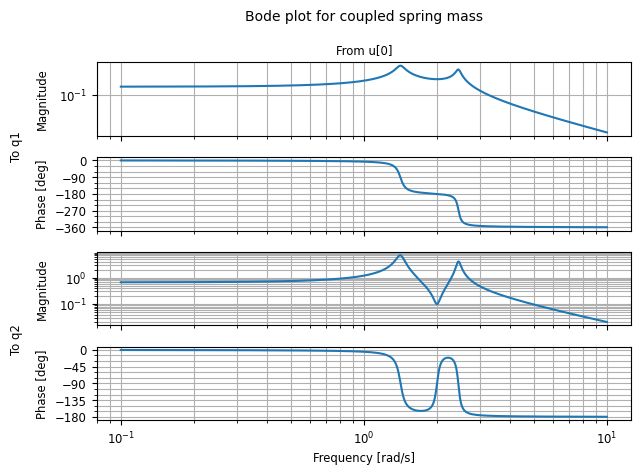

In [21]:
freqresp = ct.frequency_response(sys)
cplt = freqresp.plot()

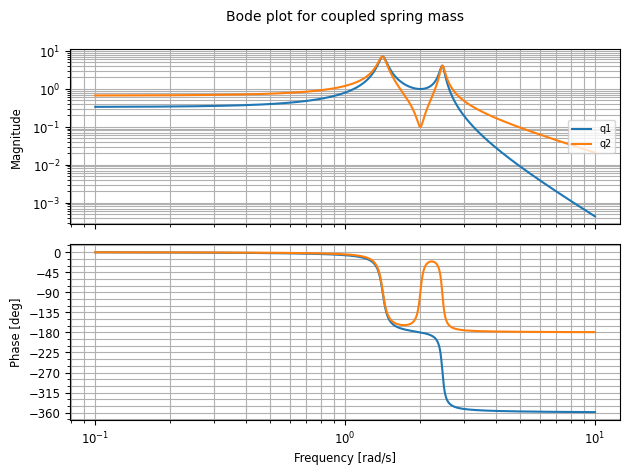

In [22]:
cplt = ct.bode_plot(sys, overlay_outputs=True)